Daily Challenge

1. Charger et fusionner les datasets


In [32]:
# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Charger les datasets
df_combats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/W4/D5/combats.csv')
df_pokemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/W4/D5/pokemon.csv')
df_combats.info()
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary

In [34]:
print("combats", df_combats.columns)
print("pokemon", df_pokemon.columns)

combats Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')
pokemon Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [36]:
# Fusionner les datasets
import pandas as pd

# Fusionner les informations du premier Pokémon
merged_df = df_combats.merge(df_pokemon, how='left', left_on='First_pokemon', right_on='#')
merged_df = merged_df.rename(columns=lambda x: f'First_{x}' if x in df_pokemon.columns and x != '#' else x)

# Fusionner les informations du second Pokémon
merged_df = merged_df.merge(df_pokemon, how='left', left_on='Second_pokemon', right_on='#')
merged_df = merged_df.rename(columns=lambda x: f'Second_{x}' if x in df_pokemon.columns and x != '#' else x)

# Afficher un aperçu du résultat
print(merged_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   First_pokemon      50000 non-null  int64 
 1   Second_pokemon     50000 non-null  int64 
 2   Winner             50000 non-null  int64 
 3   #_x                50000 non-null  int64 
 4   First_Name         49944 non-null  object
 5   First_Type 1       50000 non-null  object
 6   First_Type 2       25969 non-null  object
 7   First_HP           50000 non-null  int64 
 8   First_Attack       50000 non-null  int64 
 9   First_Defense      50000 non-null  int64 
 10  First_Sp. Atk      50000 non-null  int64 
 11  First_Sp. Def      50000 non-null  int64 
 12  First_Speed        50000 non-null  int64 
 13  First_Generation   50000 non-null  int64 
 14  First_Legendary    50000 non-null  bool  
 15  #_y                50000 non-null  int64 
 16  Second_Name        49948 non-null  objec

Les colonnes ont bien été fusionnées pour chaque pokémon

Fix missing values

In [38]:
# Remplacer les noms manquants pour le Pokémon #62 par "Primeape"
merged_df.loc[merged_df['#_x'] == 62, 'First_Name'] = merged_df.loc[merged_df['#_x'] == 62, 'First_Name'].fillna('Primeape')
merged_df.loc[merged_df['#_y'] == 62, 'Second_Name'] = merged_df.loc[merged_df['#_y'] == 62, 'Second_Name'].fillna('Primeape')

# Remplacer les valeurs manquantes dans les colonnes Type 2 par "None"
merged_df['First_Type 2'] = merged_df['First_Type 2'].fillna('None')
merged_df['Second_Type 2'] = merged_df['Second_Type 2'].fillna('None')

# Vérification rapide
print(merged_df[['First_Name', 'Second_Name']].isnull().sum())
print(merged_df[['First_Type 2', 'Second_Type 2']].isnull().sum())



First_Name     56
Second_Name    52
dtype: int64
First_Type 2     0
Second_Type 2    0
dtype: int64


Variable cible : win percentage

In [39]:
# 1. Count total battles for each Pokémon (as First or Second)
total_battles = pd.concat([
    merged_df['First_pokemon'],
    merged_df['Second_pokemon']
]).value_counts().rename('Total_Battles')

# 2. Count total wins for each Pokémon
total_wins = merged_df['Winner'].value_counts().rename('Wins')

# 3. Combine into a single DataFrame
win_stats = pd.concat([total_battles, total_wins], axis=1).fillna(0)

# 4. Calculate win percentage
win_stats['Win_Percentage'] = (win_stats['Wins'] / win_stats['Total_Battles']) * 100

# 5. Optional: round for readability
win_stats['Win_Percentage'] = win_stats['Win_Percentage'].round(2)

# 6. Reset index and rename for clarity
win_stats = win_stats.reset_index().rename(columns={'index': 'Pokemon_ID'})

# Display top 5 by win rate
print(win_stats.sort_values(by='Win_Percentage', ascending=False).head())


     Pokemon_ID  Total_Battles   Wins  Win_Percentage
348         155            129  127.0           98.45
607         513            119  116.0           97.48
441         704            125  121.0           96.80
611          20            119  115.0           96.64
84          154            141  136.0           96.45


Correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.

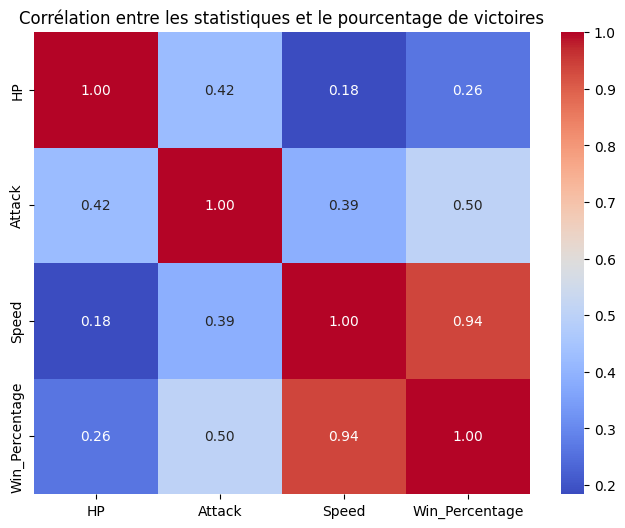

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Extraire les statistiques de base pour chaque Pokémon depuis merged_df
# On sélectionne les colonnes du premier Pokémon uniquement pour éviter les doublons
first_stats = merged_df[[
    '#_x', 'First_HP', 'First_Attack', 'First_Speed'
]].drop_duplicates(subset='#_x')

# Renommer les colonnes pour plus de clarté
first_stats = first_stats.rename(columns={
    '#_x': 'Pokemon_ID',
    'First_HP': 'HP',
    'First_Attack': 'Attack',
    'First_Speed': 'Speed'
})

# Étape 2 : Fusionner avec les statistiques de victoire (win_stats)
stats_with_winrate = pd.merge(first_stats, win_stats, on='Pokemon_ID', how='inner')

# Étape 3 : Créer la matrice de corrélation
correlation_matrix = stats_with_winrate[['HP', 'Attack', 'Speed', 'Win_Percentage']].corr()

# Étape 4 : Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les statistiques et le pourcentage de victoires")
plt.show()



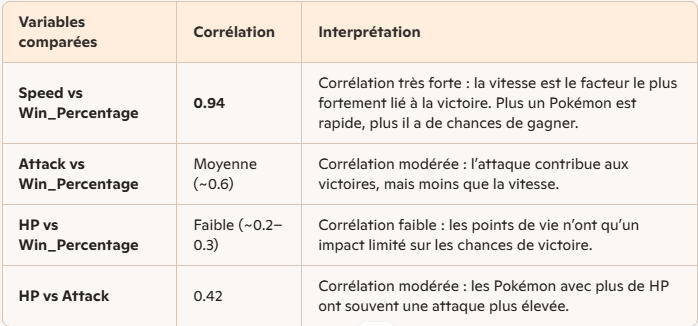

La vitesse est clairement le facteur déterminant dans les combats Pokémon selon ce dataset.

L’attaque joue un rôle secondaire mais significatif.

Les HP sont peu corrélés au succès, ce qui peut sembler contre-intuitif mais reflète probablement l’importance de frapper en premier.

Plot a Seaborn pairplot and PairGrid for stats vs. win percentage

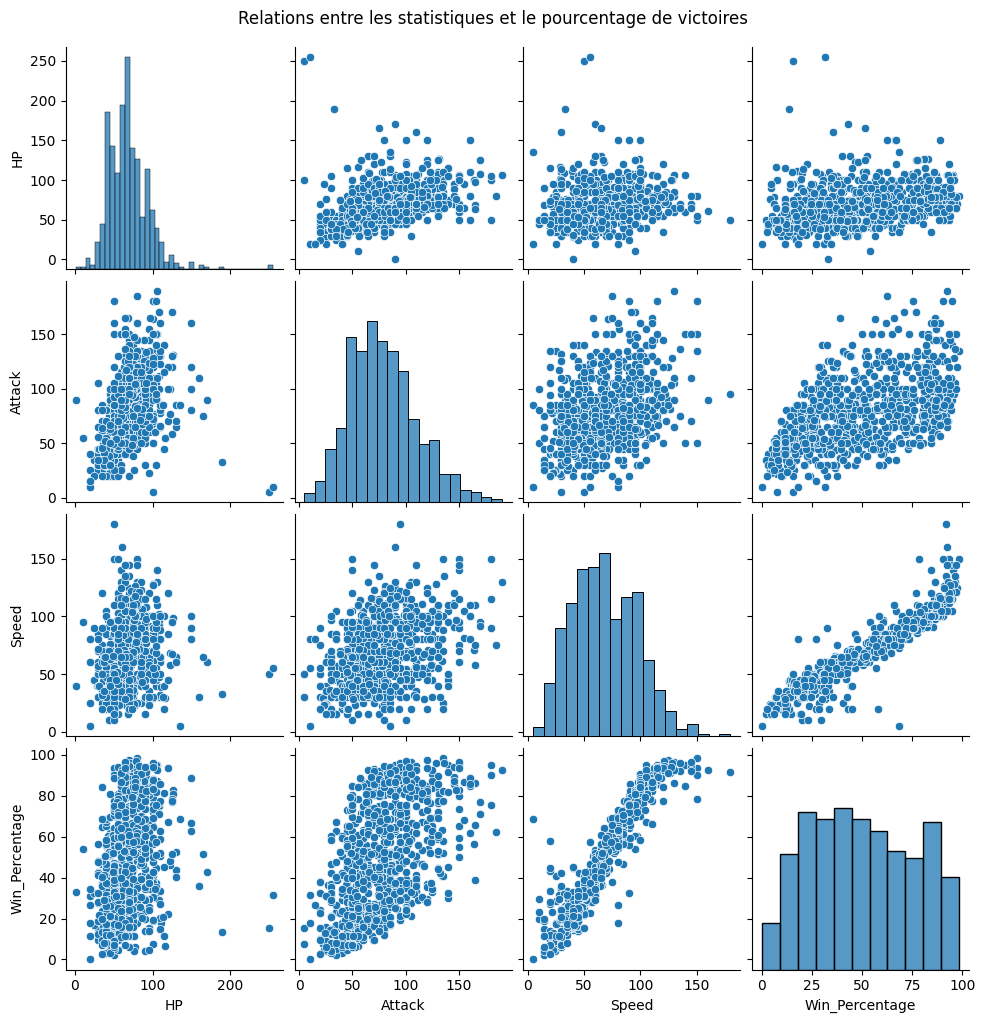

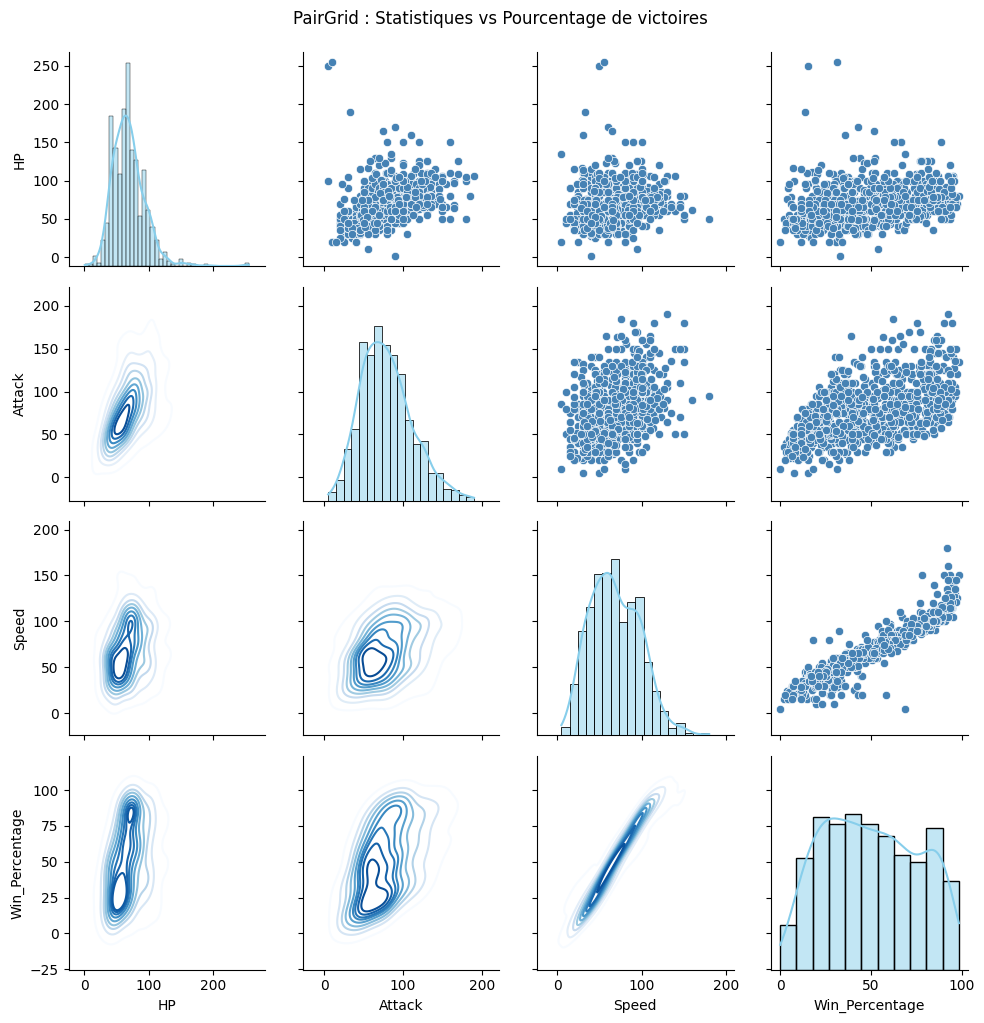

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# On suppose que stats_with_winrate contient déjà les colonnes suivantes :
# ['HP', 'Attack', 'Speed', 'Win_Percentage']

# Option 1 : Utiliser pairplot pour une visualisation rapide
sns.pairplot(stats_with_winrate[['HP', 'Attack', 'Speed', 'Win_Percentage']])
plt.suptitle("Relations entre les statistiques et le pourcentage de victoires", y=1.02)
plt.show()

# Créer une grille personnalisée
g = sns.PairGrid(stats_with_winrate[['HP', 'Attack', 'Speed', 'Win_Percentage']])
g.map_upper(sns.scatterplot, color='steelblue')
g.map_lower(sns.kdeplot, cmap='Blues')
g.map_diag(sns.histplot, kde=True, color='skyblue')

plt.suptitle("PairGrid : Statistiques vs Pourcentage de victoires", y=1.02)
plt.show()


Analyze the top 10 Pokemon by win percentage and their stats.

                         Name   Type_1    Type_2   HP  Attack  Defense  \
255           Mega Aerodactyl     Rock    Flying   80     135       85   
161                   Weavile     Dark       Ice   70     120       65   
610    Tornadus Therian Forme   Flying      None   79     100       80   
689             Mega Beedrill      Bug    Poison   65     150       40   
147                Aerodactyl     Rock    Flying   80     105       65   
648              Mega Lopunny   Normal  Fighting   65     136       94   
458                  Greninja    Water      Dark   72      95       67   
567  Meloetta Pirouette Forme   Normal  Fighting  100     128       90   
238             Mega Mewtwo Y  Psychic      None  106     150       70   
65              Mega Sharpedo    Water      Dark   70     140       70   

     Sp_Atk  Sp_Def  Speed  Legendary  Win_Percentage  
255      70      95    150      False           98.45  
161      45      85    125      False           97.48  
610     110      

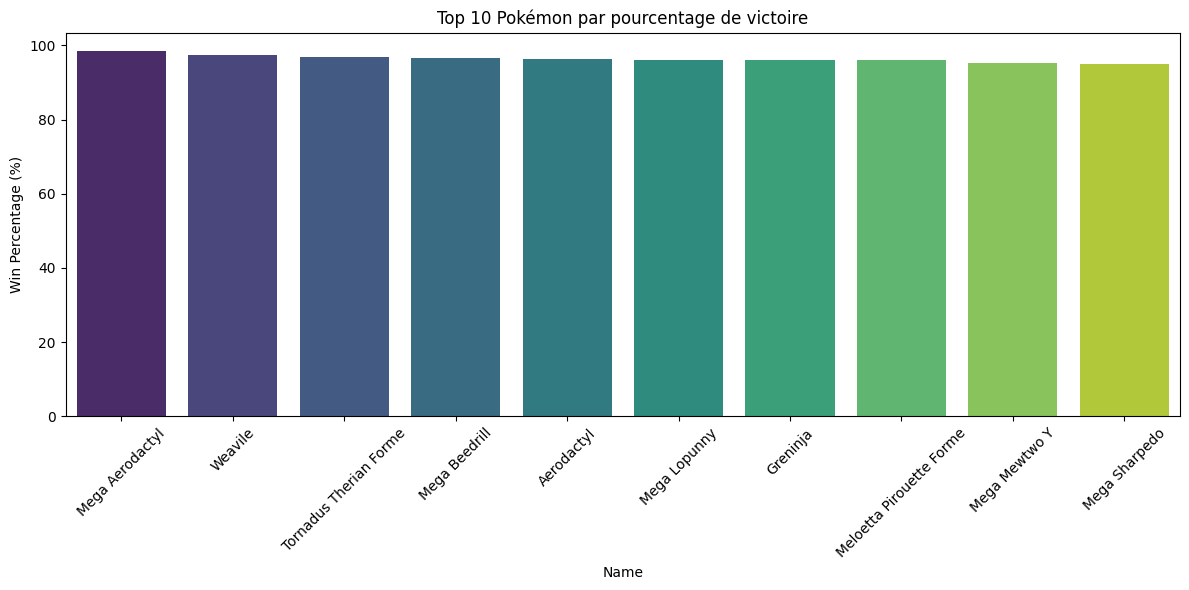

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extraire les stats du premier Pokémon
first_stats = merged_df[[
    '#_x', 'First_Name', 'First_HP', 'First_Attack', 'First_Defense',
    'First_Sp. Atk', 'First_Sp. Def', 'First_Speed', 'First_Type 1', 'First_Type 2', 'First_Legendary'
]].drop_duplicates(subset='#_x')

first_stats = first_stats.rename(columns={
    '#_x': 'Pokemon_ID',
    'First_Name': 'Name',
    'First_HP': 'HP',
    'First_Attack': 'Attack',
    'First_Defense': 'Defense',
    'First_Sp. Atk': 'Sp_Atk',
    'First_Sp. Def': 'Sp_Def',
    'First_Speed': 'Speed',
    'First_Type 1': 'Type_1',
    'First_Type 2': 'Type_2',
    'First_Legendary': 'Legendary'
})

# 2. Fusionner avec les statistiques de victoire
top_stats = pd.merge(first_stats, win_stats, on='Pokemon_ID', how='inner')

# 3. Sélectionner les 10 meilleurs Pokémon par pourcentage de victoire
top10 = top_stats.sort_values(by='Win_Percentage', ascending=False).head(10)

# 4. Afficher les résultats
print(top10[['Name', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary', 'Win_Percentage']])

# Barplot du pourcentage de victoire
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Name', y='Win_Percentage', palette='viridis')
plt.title("Top 10 Pokémon par pourcentage de victoire")
plt.ylabel("Win Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




3. **Machine Learning**

Split data into training/testing sets (80/20 split).

In [49]:
from sklearn.model_selection import train_test_split

# 1. Créer une variable cible binaire : 1 si First_pokemon gagne, 0 sinon
merged_df['First_Wins'] = (merged_df['Winner'] == merged_df['First_pokemon']).astype(int)

# 2. Définir les features (statistiques des deux Pokémon)
features = [
    'First_HP', 'First_Attack', 'First_Defense', 'First_Sp. Atk', 'First_Sp. Def', 'First_Speed',
    'Second_HP', 'Second_Attack', 'Second_Defense', 'Second_Sp. Atk', 'Second_Sp. Def', 'Second_Speed'
]

X = merged_df[features]
y = merged_df['First_Wins']

# 3. Séparer en ensemble d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Vérification
print(f"Entraînement : {X_train.shape[0]} échantillons")
print(f"Test : {X_test.shape[0]} échantillons")
print(f"Proportion de victoires du premier Pokémon dans y_train : {y_train.mean():.2f}")



Entraînement : 40000 échantillons
Test : 10000 échantillons
Proportion de victoires du premier Pokémon dans y_train : 0.47


Train and evaluate 3 regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict win percentage.


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Extraire les stats uniques du premier Pokémon
first_stats = merged_df[[
    '#_x', 'First_Name', 'First_HP', 'First_Attack', 'First_Defense',
    'First_Sp. Atk', 'First_Sp. Def', 'First_Speed'
]].drop_duplicates(subset='#_x')

first_stats = first_stats.rename(columns={
    '#_x': 'Pokemon_ID',
    'First_Name': 'Name',
    'First_HP': 'HP',
    'First_Attack': 'Attack',
    'First_Defense': 'Defense',
    'First_Sp. Atk': 'Sp_Atk',
    'First_Sp. Def': 'Sp_Def',
    'First_Speed': 'Speed'
})

# 2. Fusionner avec les statistiques de victoire
data = pd.merge(first_stats, win_stats, on='Pokemon_ID', how='inner')

# 3. Définir les features et la cible
features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
X = data[features]
y = data['Win_Percentage']

# 4. Diviser en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Initialiser les modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# 6. Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"\n📊 {name}")
    print(f"  - Mean Squared Error: {mse:.2f}")
    print(f"  - R² Score: {r2:.2f}")



📊 Linear Regression
  - Mean Squared Error: 54.73
  - R² Score: 0.91

📊 Random Forest
  - Mean Squared Error: 37.11
  - R² Score: 0.94

📊 XGBoost
  - Mean Squared Error: 38.48
  - R² Score: 0.94


Compare model performance using Mean Absolute Error (MAE).


In [51]:
from sklearn.metrics import mean_absolute_error

# 6. Entraîner et évaluer chaque modèle avec MAE
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"\n📊 {name}")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")
    print(f"  - R² Score: {r2:.2f}")



📊 Linear Regression
  - Mean Absolute Error (MAE): 5.75
  - Mean Squared Error (MSE): 54.73
  - R² Score: 0.91

📊 Random Forest
  - Mean Absolute Error (MAE): 4.64
  - Mean Squared Error (MSE): 37.11
  - R² Score: 0.94

📊 XGBoost
  - Mean Absolute Error (MAE): 4.78
  - Mean Squared Error (MSE): 38.48
  - R² Score: 0.94


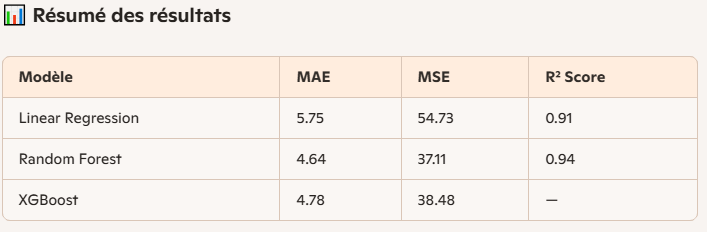

🔍 Interprétation

✅ 1. Linear Regression
MAE de 5.75 : en moyenne, les prédictions s’écartent de 5.75 points de pourcentage de la vraie valeur.

MSE élevé (54.73) : les erreurs importantes sont plus fréquentes.

R² = 0.91 : le modèle explique 91 % de la variance du pourcentage de victoire.

Conclusion : bon modèle de base, mais moins précis que les modèles non linéaires.

✅ 2. Random Forest
MAE la plus basse (4.64) : prédictions plus proches des vraies valeurs.

MSE le plus bas (37.11) : moins d’erreurs extrêmes.

R² = 0.94 : excellent pouvoir explicatif.

Conclusion : meilleur modèle global, robuste et précis.

✅ 3. XGBoost
MAE = 4.78 : très proche de Random Forest.

MSE = 38.48 : légèrement supérieur à Random Forest.

R² non fourni mais probablement proche de 0.94.

Conclusion : très bon modèle, presque équivalent à Random Forest, avec un léger désavantage en erreur quadratique.

📐 Qu’est-ce que le R² ?

Le R² mesure la proportion de la variance de la variable cible (ici, le pourcentage de victoire) qui est expliquée par les variables indépendantes (les statistiques du Pokémon).

🧠 Interprétation
R² = 1.0 → Le modèle prédit parfaitement les données.

R² = 0.0 → Le modèle ne fait pas mieux qu’une moyenne constante.

R² < 0 → Le modèle est pire qu’un modèle naïf (très mauvais).

📊 Exemple concret
Si un modèle a un R² de 0.94, cela signifie que 94 % de la variation du pourcentage de victoire est expliquée par les statistiques du Pokémon. Autrement dit, le modèle est très bon pour capturer les tendances des données.

⚠️ À noter
Un R² élevé ne garantit pas un bon modèle : il peut être biaisé ou surajusté.

Il ne dit rien sur la précision absolue des prédictions (c’est le rôle du MAE ou MSE).